In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import joblib
import os

# Scikit-learn imports
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, 
                               BaggingClassifier, AdaBoostClassifier, 
                               GradientBoostingClassifier, HistGradientBoostingClassifier)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             ConfusionMatrixDisplay)
from sklearn.feature_selection import SelectKBest, f_classif

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [103]:
# # Set the base data path
# data_path = Path("data set")

# # Load the three CSV files
# print("Loading CSV files...")
# accidents_df = pd.read_csv(data_path / "Accidents_2018.csv")
# casualties_df = pd.read_csv(data_path / "Casualties_2018.csv")
# vehicles_df = pd.read_csv(data_path / "Vehicles_2018.csv")

# print(f"Accidents dataset shape: {accidents_df.shape}")
# print(f"Casualties dataset shape: {casualties_df.shape}")
# print(f"Vehicles dataset shape: {vehicles_df.shape}")


In [104]:
# accidents_df.head()

In [105]:
# print("Accidents Dataset columns:", accidents_df.columns.tolist())

In [106]:
# # Create aggregations for Casualties
# casualties_agg = casualties_df.groupby('Accident_Index').agg({
#     'Casualty_Reference': 'count',  # Number of casualties
#     'Casualty_Severity': 'mean',    # Average severity
#     'Age_of_Casualty': 'mean',      # Average age
#     'Sex_of_Casualty': lambda x: (x == 1).sum(),  # Count of male casualties
# }).rename(columns={
#     'Casualty_Reference': 'Total_Casualties',
#     'Casualty_Severity': 'Avg_Casualty_Severity',
#     'Age_of_Casualty': 'Avg_Casualty_Age',
#     'Sex_of_Casualty': 'Male_Casualties'
# })

# print("Casualties aggregation shape:", casualties_agg.shape)


In [107]:
# # Create aggregations for Vehicles
# vehicles_agg = vehicles_df.groupby('Accident_Index').agg({
#     'Vehicle_Reference': 'count',  # Number of vehicles
#     'Age_of_Driver': 'mean',       # Average driver age
#     'Sex_of_Driver': lambda x: (x == 1).sum(),  # Count of male drivers
# }).rename(columns={
#     'Vehicle_Reference': 'Total_Vehicles',
#     'Age_of_Driver': 'Avg_Driver_Age',
#     'Sex_of_Driver': 'Male_Drivers'
# })

# print("Vehicles aggregation shape:", vehicles_agg.shape)


In [108]:

# # Merge all dataframes
# df = accidents_df.copy()
# df = df.merge(casualties_agg, left_on='Accident_Index', right_index=True, how='left')
# df = df.merge(vehicles_agg, left_on='Accident_Index', right_index=True, how='left')

In [109]:
# df = df.drop_duplicates(subset=['Accident_Index'])

In [110]:
# print(f"\nMerged dataset shape: {df.shape}")


In [111]:
# print(f"Total columns: {len(df.columns)}")


In [2]:
#loading Data
df1=pd.read_csv(r'D:\nti crativa\final project\data set\Accidents_2018.csv')
df2=pd.read_csv(r'D:\nti crativa\final project\data set\Casualties_2018.csv')
df3=pd.read_csv(r'D:\nti crativa\final project\data set\Vehicles_2018.csv')

In [3]:
#merging all dataset together (merging df1 and df2)
dataFrame=pd.merge(df1,df2,on='Accident_Index')

#check data shape
print('Accidents_2018 data shape is :' , df1.shape)
print('Casualties_2018 data shape is :' ,df2.shape)
print('Vehicles_2018 data shape is :' ,df3.shape)



Accidents_2018 data shape is : (122635, 32)
Casualties_2018 data shape is : (160597, 16)
Vehicles_2018 data shape is : (226409, 23)


In [4]:
#check data shape after merging 
dataFrame.shape

(140958, 47)

In [5]:
dataFrame.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010130027,523810.0,185730.0,-0.215455,51.556878,1,3,2,1,01/09/2018,...,6,3,0,0,0,0,0,3,1,6
1,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,6,3,0,0,0,2,0,11,1,3
2,2018010130028,517980.0,185050.0,-0.299739,51.552014,1,3,1,2,01/09/2018,...,1,3,0,0,0,2,0,11,1,3
3,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,0,0,0,9,1,4
4,2018010130030,542820.0,182610.0,0.057318,51.524353,1,3,2,2,01/09/2018,...,7,3,0,0,2,0,0,9,1,4


In [6]:
df=pd.merge(dataFrame,df3,on='Accident_Index')

In [7]:
print(f"First few rows of merged data:")
df.head()


First few rows of merged data:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,2,18,4,1499,1,-1,8,2,8
1,2018010135259,534140.0,168370.0,-0.073120,51.398512,1,3,2,1,25/09/2018,...,6,3,-1,-1,1999,1,16,-1,-1,-1
2,2018010135261,535780.0,185300.0,-0.043058,51.550261,1,3,1,1,07/09/2018,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010135264,534120.0,192440.0,-0.064263,51.614820,1,3,1,1,27/09/2018,...,2,1,56,9,2967,2,1,1,1,1
4,2018010135268,529080.0,162590.0,-0.147913,51.347739,1,3,2,2,26/09/2018,...,6,1,78,11,1339,1,8,10,1,10


In [8]:
print(f"\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270941 entries, 0 to 270940
Data columns (total 69 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               270941 non-null  object 
 1   Location_Easting_OSGR                        270821 non-null  float64
 2   Location_Northing_OSGR                       270821 non-null  float64
 3   Longitude                                    270821 non-null  float64
 4   Latitude                                     270821 non-null  float64
 5   Police_Force                                 270941 non-null  int64  
 6   Accident_Severity                            270941 non-null  int64  
 7   Number_of_Vehicles                           270941 non-null  int64  
 8   Number_of_Casualties                         270941 non-null  int64  
 9   Date                                        

In [12]:
df.isna().sum().sort_values(ascending=0).head(10)

LSOA_of_Accident_Location    15762
Longitude                      120
Location_Northing_OSGR         120
Latitude                       120
Location_Easting_OSGR          120
Time                            34
Accident_Index                   0
Number_of_Vehicles               0
Police_Force                     0
Number_of_Casualties             0
dtype: int64

In [13]:
drop_columns = [
    'Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
    'Longitude', 'Latitude', 'LSOA_of_Accident_Location',  
    'Date', 'Time', 
    'Local_Authority_(District)', 'Local_Authority_(Highway)', 
    '1st_Road_Number', '2nd_Road_Number' 
]

droped_columns = [col for col in drop_columns if col in df.columns]

df_clean = df.drop(columns=droped_columns)

print(f"Removed columns: {droped_columns}")
print(f"Dataset shape after column removal: {df_clean.shape}")
print(f"Remaining columns: {df_clean.columns.tolist()}")

Removed columns: ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude', 'LSOA_of_Accident_Location', 'Date', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Number', '2nd_Road_Number']
Dataset shape after column removal: (270941, 57)
Remaining columns: ['Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Reference_x', 'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passeng

In [14]:
print("Missing values analysis:")
missing_data = df_clean.isnull().sum()
missing_percent = (missing_data / len(df_clean)) * 100
missing_df = pd.DataFrame({
    'Column': df_clean.columns,
    'Missing_Count': missing_data.values,
    'Missing_Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_df)


Missing values analysis:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []


In [15]:
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype in ['int64', 'float64']:
            # Fill with median for numerical columns
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
        else:
            # Fill with mode for categorical, or a placeholder if mode doesn't exist
            try:
                df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
            except:
                df_clean[col].fillna(-1, inplace=True)

print(f"Total missing values: {df_clean.isnull().sum().sum()}")

Total missing values: 0


In [16]:
target_col = 'Accident_Severity'
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

print(f"Features shape: {X.shape}")
print(f"\nFeature columns ({len(X.columns)}): {X.columns.tolist()}")


Features shape: (270941, 56)

Feature columns (56): ['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', '1st_Road_Class', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Vehicle_Reference_x', 'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location', 'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger', 'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type', 'Casualty_Home_Area_Type', 'Casualty_IMD_Decile', 'Vehicle_Reference_y', 'Vehicle_Type', 'Towing_and_Articulation', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Junction_Location', 'Skidding_a

In [18]:
print(f"Target shape: {y.shape}")


Target shape: (270941,)


In [19]:
print(f"\nTarget variable statistics:")
y.describe()


Target variable statistics:


count    270941.000000
mean          2.758678
std           0.471688
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: Accident_Severity, dtype: float64

In [20]:
print(f"\nTarget class distribution:")
y.value_counts().sort_index()



Target class distribution:


Accident_Severity
1      5338
2     54708
3    210895
Name: count, dtype: int64

In [21]:
print(f"\nTarget variable statistics:")
y.describe()



Target variable statistics:


count    270941.000000
mean          2.758678
std           0.471688
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: Accident_Severity, dtype: float64

In [22]:
print(f"\nTarget class distribution:")
y.value_counts().sort_index()



Target class distribution:


Accident_Severity
1      5338
2     54708
3    210895
Name: count, dtype: int64

In [23]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")


Categorical columns: []


In [24]:
label_encoders = {}

# Encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    
# Ensure all columns are numeric
X = X.astype('float64')

In [25]:
print(f"Data types after encoding:")
X.dtypes

Data types after encoding:


Police_Force                                   float64
Number_of_Vehicles                             float64
Number_of_Casualties                           float64
Day_of_Week                                    float64
1st_Road_Class                                 float64
Road_Type                                      float64
Speed_limit                                    float64
Junction_Detail                                float64
Junction_Control                               float64
2nd_Road_Class                                 float64
Pedestrian_Crossing-Human_Control              float64
Pedestrian_Crossing-Physical_Facilities        float64
Light_Conditions                               float64
Weather_Conditions                             float64
Road_Surface_Conditions                        float64
Special_Conditions_at_Site                     float64
Carriageway_Hazards                            float64
Urban_or_Rural_Area                            float64
Did_Police

In [26]:
print(f"Final feature matrix shape: {X.shape}")


Final feature matrix shape: (270941, 56)


In [27]:
X.head()

,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,1.0,2.0,1.0,3.0,3.0,6.0,30.0,3.0,4.0,4.0,...,6.0,2.0,18.0,4.0,1499.0,1.0,-1.0,8.0,2.0,8.0
1,1.0,2.0,1.0,3.0,3.0,6.0,30.0,3.0,4.0,4.0,...,6.0,3.0,-1.0,-1.0,1999.0,1.0,16.0,-1.0,-1.0,-1.0
2,1.0,1.0,1.0,6.0,5.0,6.0,20.0,3.0,4.0,6.0,...,6.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1.0,1.0,1.0,5.0,6.0,2.0,30.0,9.0,4.0,6.0,...,2.0,1.0,56.0,9.0,2967.0,2.0,1.0,1.0,1.0,1.0
4,1.0,2.0,2.0,4.0,3.0,1.0,30.0,2.0,4.0,5.0,...,6.0,1.0,78.0,11.0,1339.0,1.0,8.0,10.0,1.0,10.0


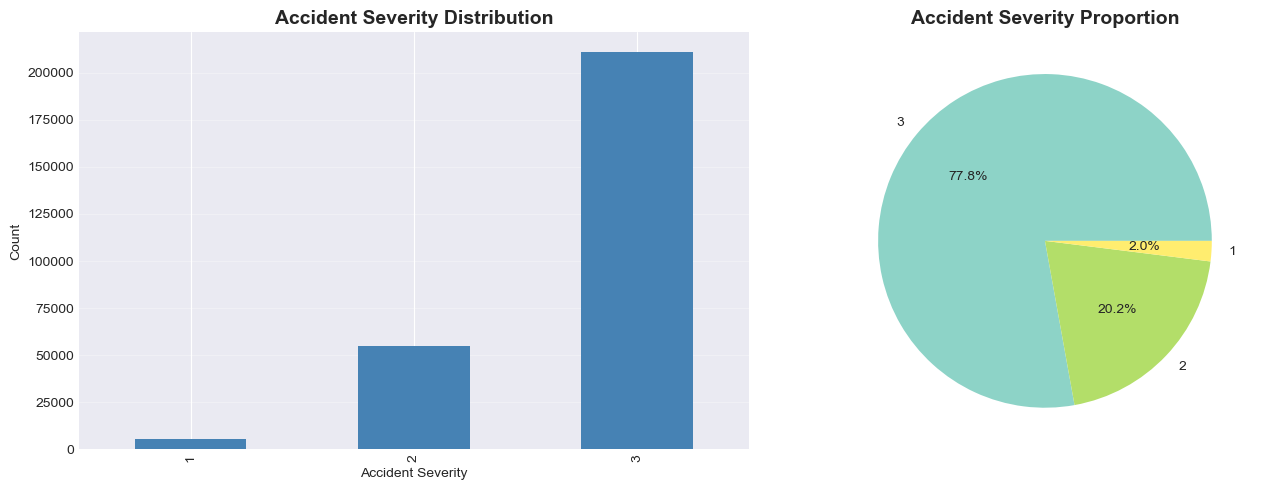

Target class distribution:
Accident_Severity
1      5338
2     54708
3    210895
Name: count, dtype: int64


In [28]:

# Plot 1: Target Variable Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
y.value_counts().sort_index().plot(kind='bar', ax=ax[0], color='steelblue')
ax[0].set_title('Accident Severity Distribution', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Accident Severity')
ax[0].set_ylabel('Count')
ax[0].grid(axis='y', alpha=0.3)

# Pie chart
colors = plt.cm.Set3(np.linspace(0, 1, len(y.unique())))
y.value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', colors=colors)
ax[1].set_title('Accident Severity Proportion', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"Target class distribution:\n{y.value_counts().sort_index()}")

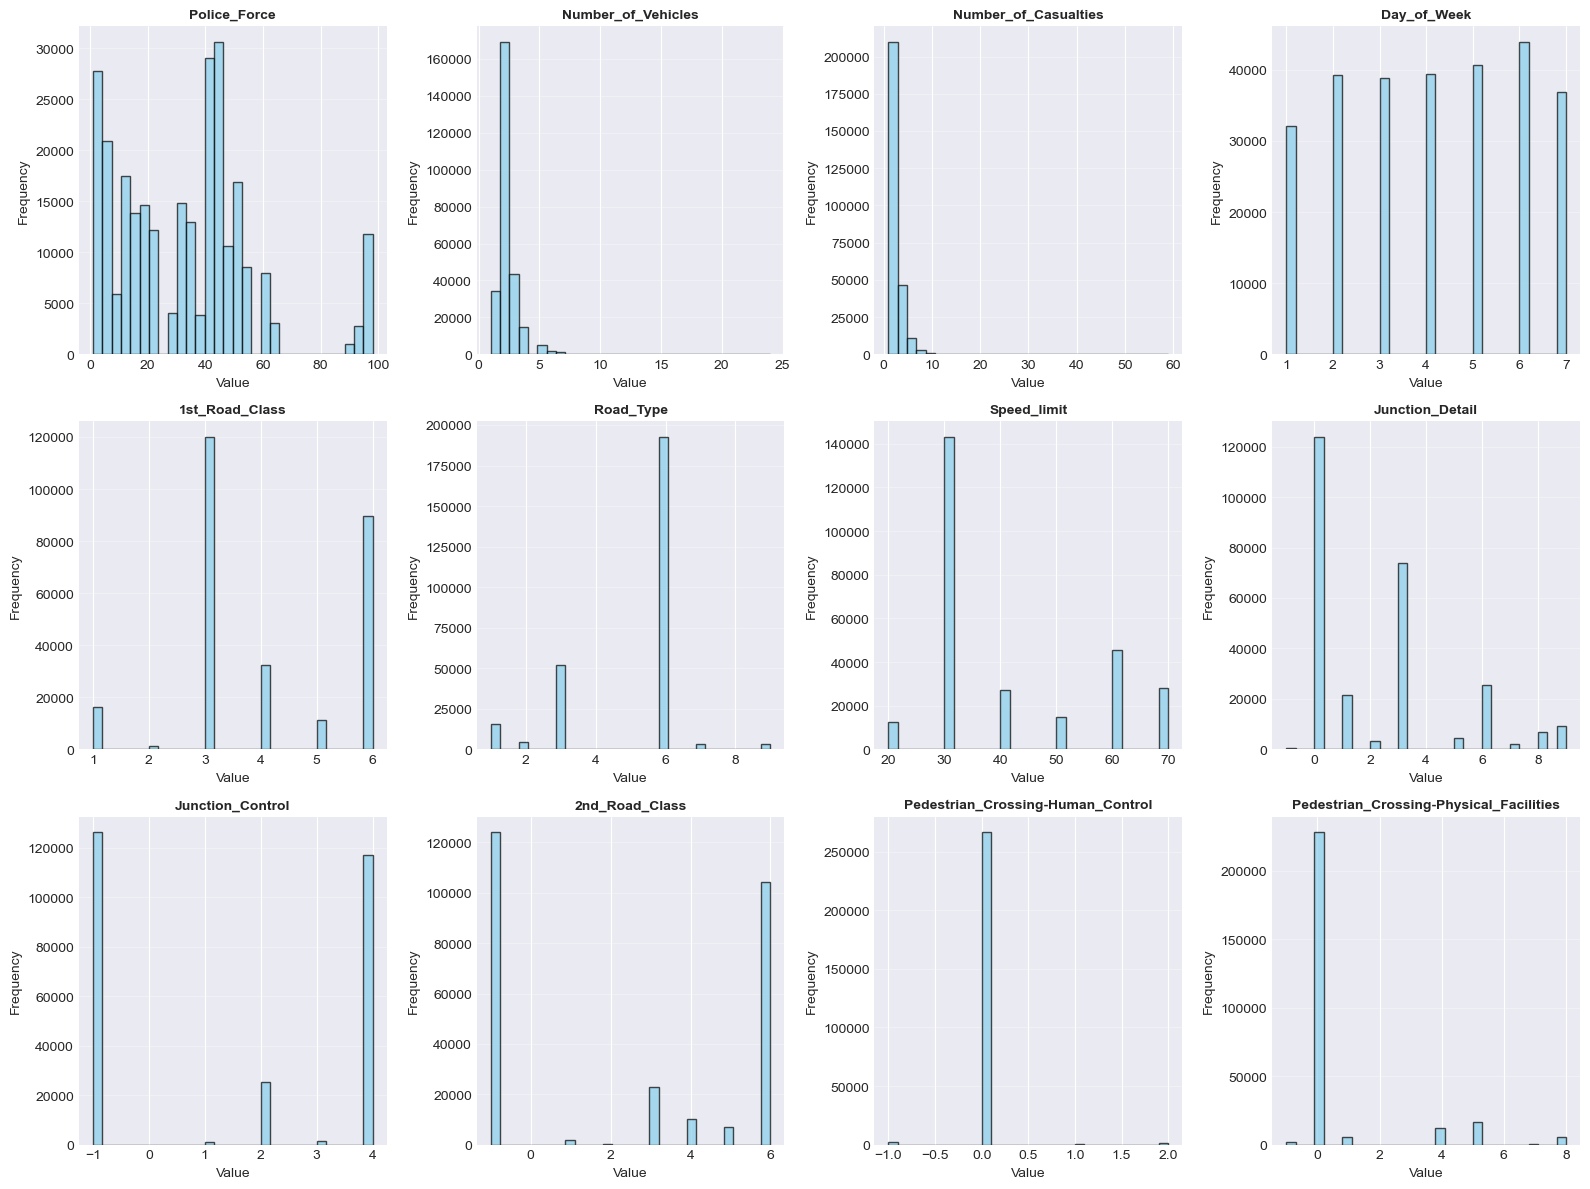

Feature distributions visualized for top 12 features


In [29]:
top_features = X.columns[:12].tolist()

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(top_features):
    axes[idx].hist(X[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
print("Feature distributions visualized for top 12 features")

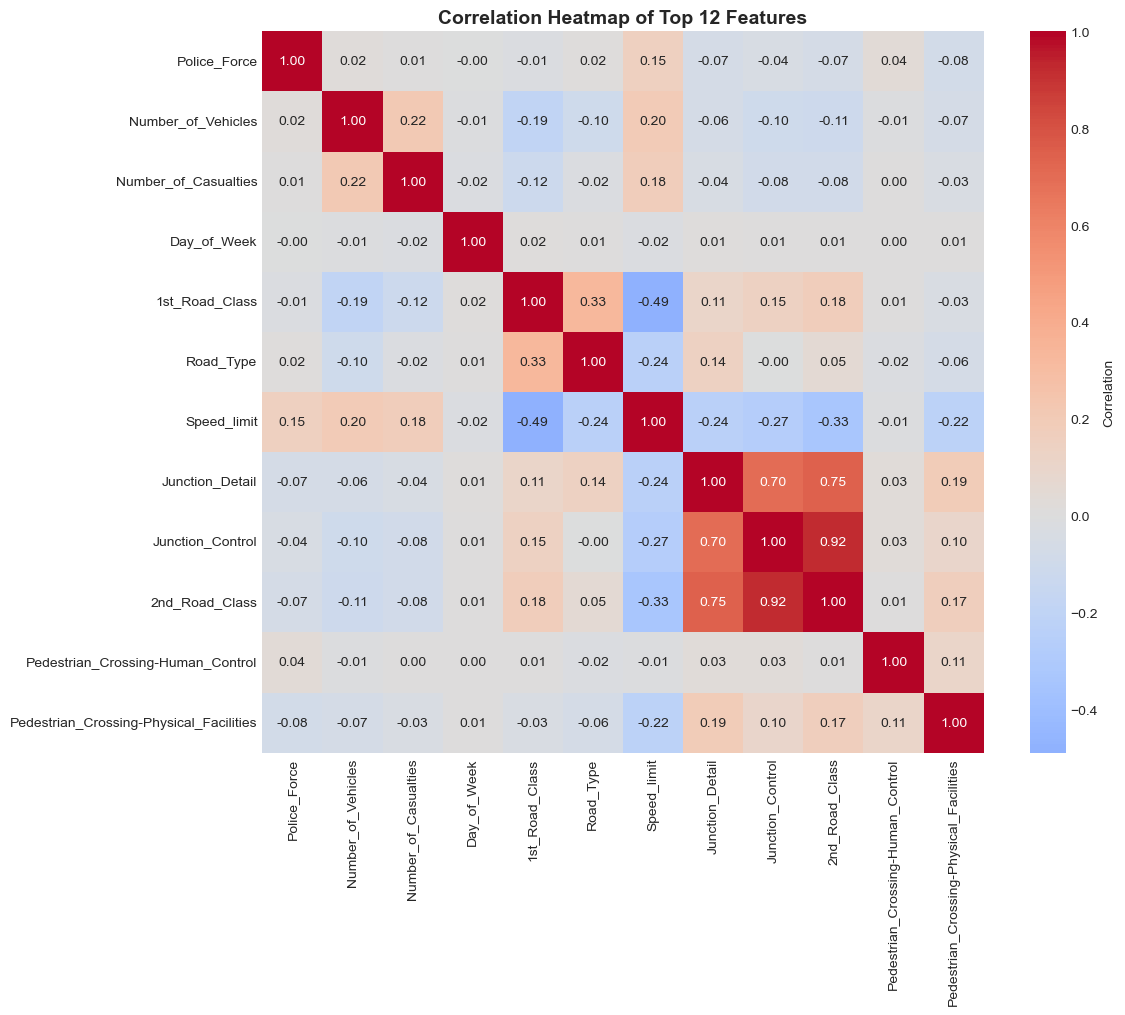

Correlation heatmap displayed


In [30]:
correlation_matrix = X[top_features].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Correlation Heatmap of Top 12 Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation heatmap displayed")

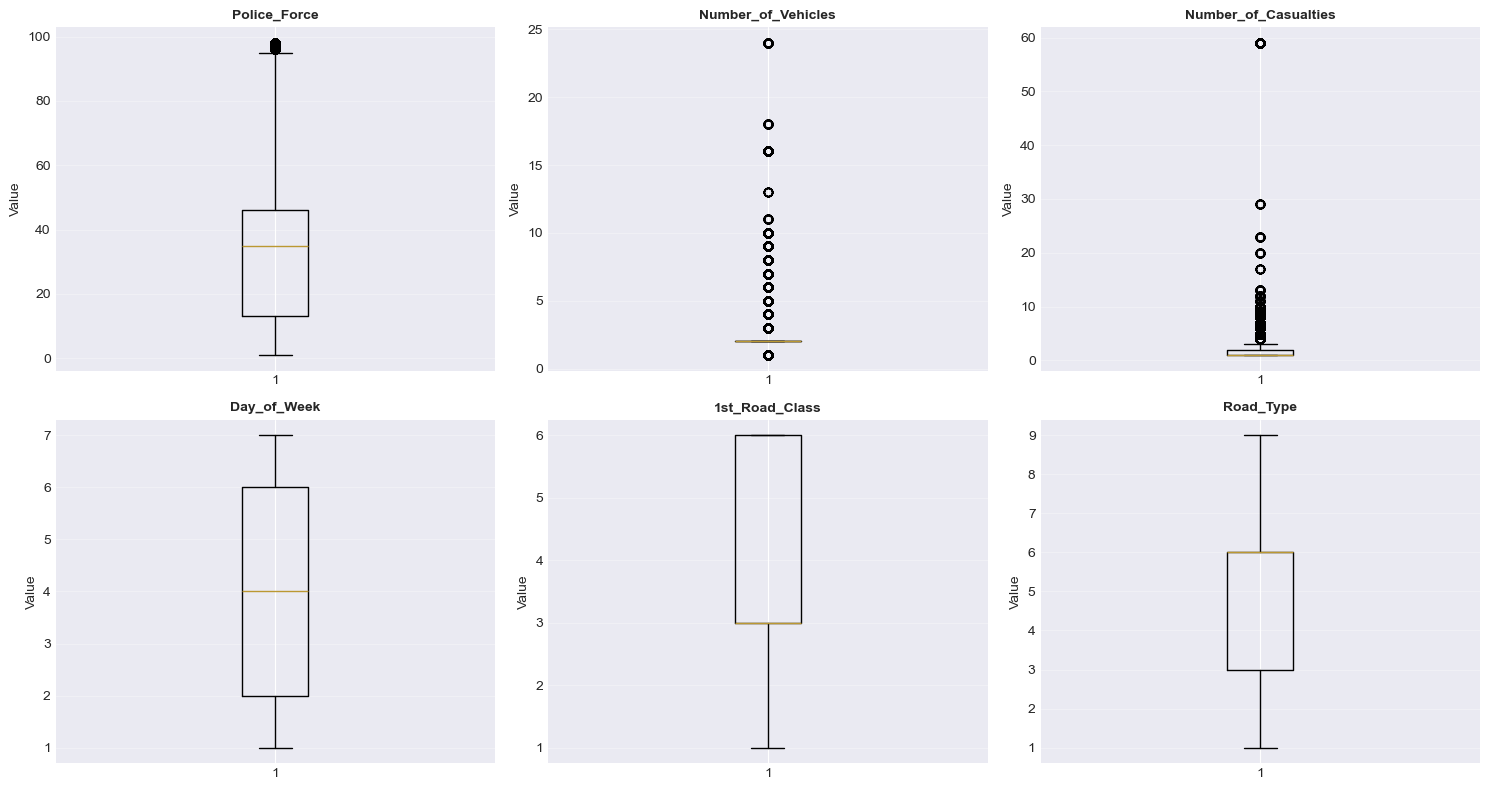

Box plots displayed for outlier detection


In [31]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(top_features[:6]):
    axes[idx].boxplot(X[col], vert=True)
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Box plots displayed for outlier detection")

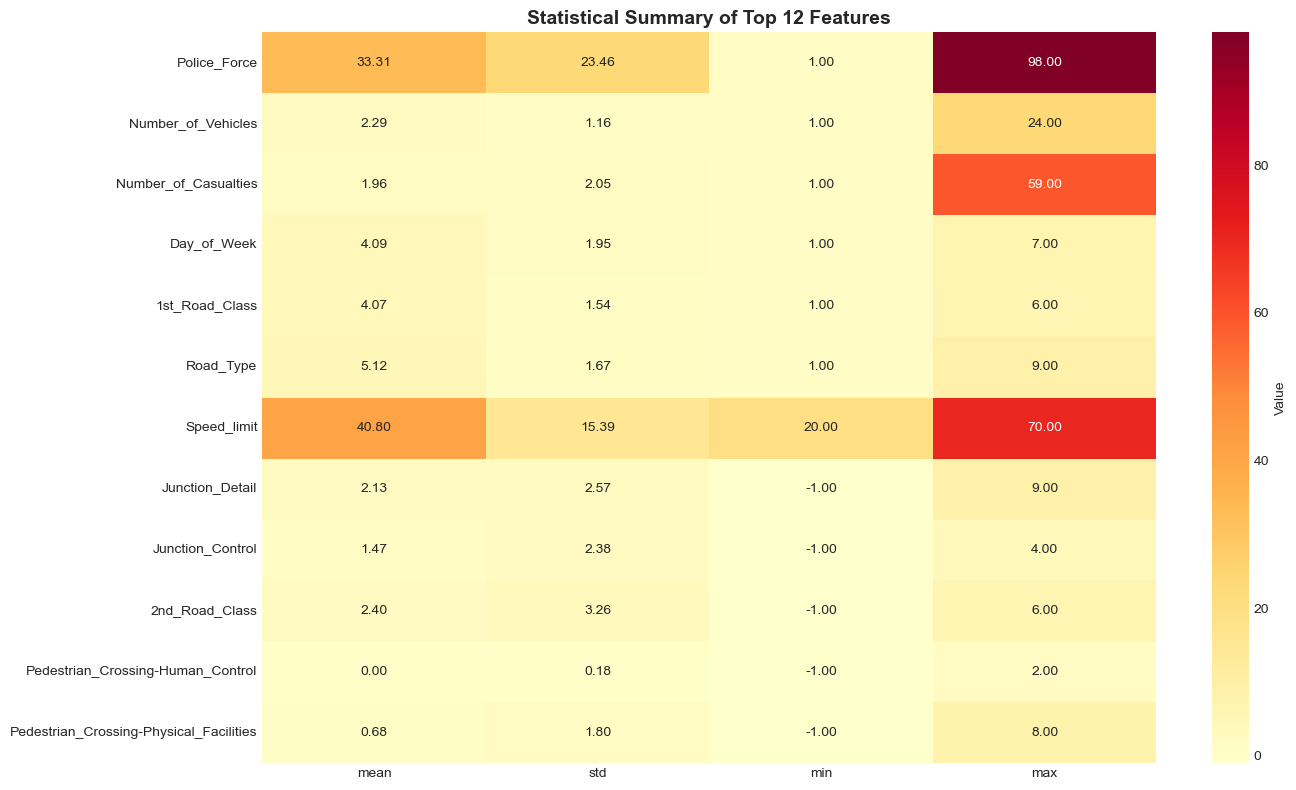

In [32]:
# Plot 5: Feature statistics summary
fig, ax = plt.subplots(figsize=(14, 8))

# Get basic statistics
stats_summary = X[top_features].describe().T

# Create a heatmap of statistics
sns.heatmap(stats_summary[['mean', 'std', 'min', 'max']], annot=True, fmt='.2f', 
            cmap='YlOrRd', ax=ax, cbar_kws={'label': 'Value'})
ax.set_title('Statistical Summary of Top 12 Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [137]:

print("Feature statistics summary:\n")
X[top_features].describe()

Feature statistics summary:



,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities
count,270941.000000,270941.000000,270941.000000,270941.000000,270941.000000,270941.00000,270941.000000,270941.000000,270941.000000,270941.000000,270941.000000,270941.000000
mean,33.313105,2.290916,1.957758,4.092205,4.069517,5.11621,40.801503,2.126950,1.468028,2.399936,0.004606,0.680846
std,23.464854,1.158296,2.047860,1.950380,1.537763,1.66557,15.386335,2.569552,2.375888,3.256890,0.176457,1.804704
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,13.000000,2.000000,1.000000,2.000000,3.000000,3.00000,30.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000
50%,35.000000,2.000000,1.000000,4.000000,3.000000,6.00000,30.000000,1.000000,2.000000,3.000000,0.000000,0.000000
75%,46.000000,2.000000,2.000000,6.000000,6.000000,6.00000,60.000000,3.000000,4.000000,6.000000,0.000000,0.000000
max,98.000000,24.000000,59.000000,7.000000,6.000000,9.00000,70.000000,9.000000,4.000000,6.000000,2.000000,8.000000


In [138]:
# Method 1: Feature importance from Random Forest
print("Method 1: Random Forest Feature Importance")
print("=" * 70)

# Train a quick Random Forest to get feature importances
rf_quick = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
rf_quick.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_quick.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 20 Most Important Features:")
print(feature_importances.head(20))



Method 1: Random Forest Feature Importance

Top 20 Most Important Features:
                                        Feature  Importance
25                            Casualty_Severity    0.737969
2                          Number_of_Casualties    0.036846
31                                Casualty_Type    0.017287
20                           Casualty_Reference    0.011837
37                            Vehicle_Manoeuvre    0.009688
0                                  Police_Force    0.009540
1                            Number_of_Vehicles    0.009224
23                              Age_of_Casualty    0.009172
6                                   Speed_limit    0.008885
18  Did_Police_Officer_Attend_Scene_of_Accident    0.008818
35                                 Vehicle_Type    0.008681
42                  Vehicle_Leaving_Carriageway    0.007493
48                                Age_of_Driver    0.007406
50                         Engine_Capacity_(CC)    0.007262
17                      

In [139]:
# Select top N features
N_TOP_FEATURES = 20
top_features_selected = feature_importances.head(N_TOP_FEATURES)['Feature'].tolist()
print(f"Selected top {N_TOP_FEATURES} features for modeling:")
top_features_selected

Selected top 20 features for modeling:


['Casualty_Severity',
 'Number_of_Casualties',
 'Casualty_Type',
 'Casualty_Reference',
 'Vehicle_Manoeuvre',
 'Police_Force',
 'Number_of_Vehicles',
 'Age_of_Casualty',
 'Speed_limit',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Vehicle_Type',
 'Vehicle_Leaving_Carriageway',
 'Age_of_Driver',
 'Engine_Capacity_(CC)',
 'Urban_or_Rural_Area',
 'Day_of_Week',
 'Age_of_Vehicle',
 'Age_Band_of_Casualty',
 'Casualty_IMD_Decile',
 'Light_Conditions']

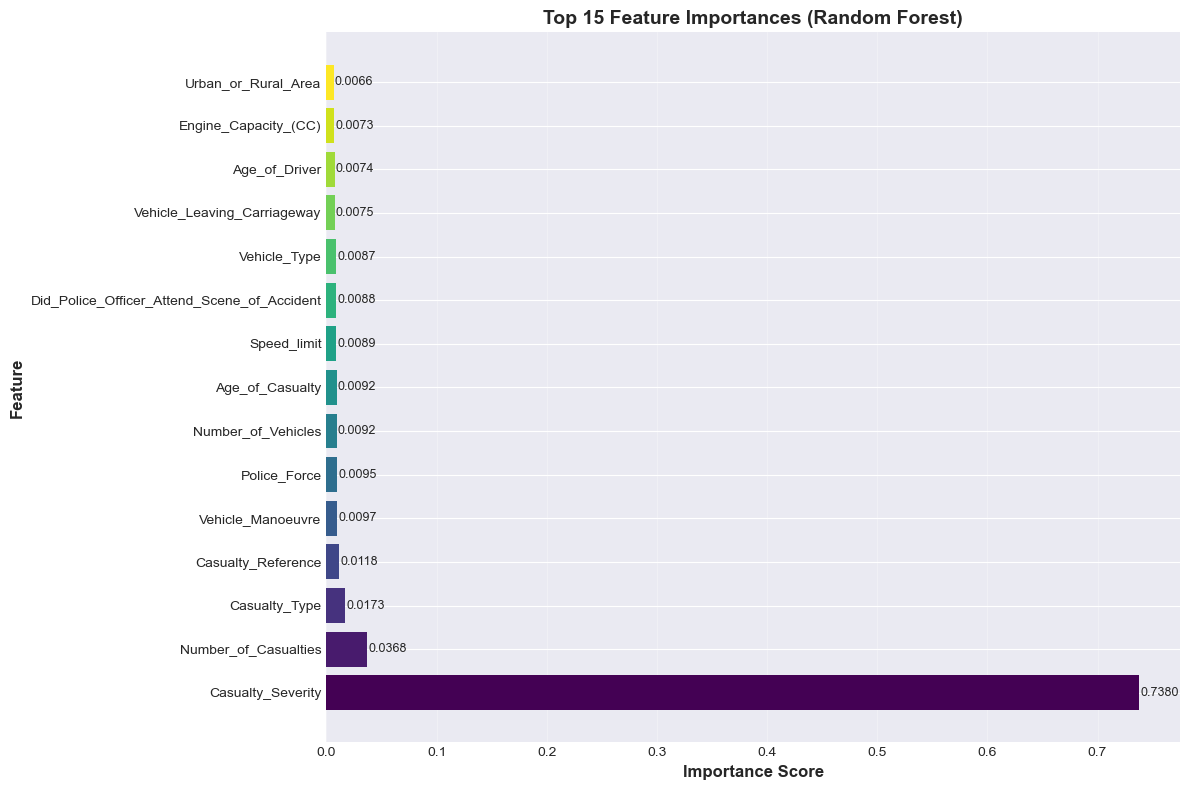

In [140]:
# Visualize feature importance
fig, ax = plt.subplots(figsize=(12, 8))

top_15_features = feature_importances.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15_features)))

ax.barh(range(len(top_15_features)), top_15_features['Importance'], color=colors)
ax.set_yticks(range(len(top_15_features)))
ax.set_yticklabels(top_15_features['Feature'])
ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_15_features['Importance']):
    ax.text(v + 0.001, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [141]:
# Method 2: SelectKBest with f_classif
print("\nMethod 2: SelectKBest Statistical Test")
print("=" * 70)

# Use SelectKBest to identify most important features
selector = SelectKBest(score_func=f_classif, k=N_TOP_FEATURES)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_indices = selector.get_support(indices=True)
selectkbest_features = X.columns[selected_indices].tolist()

# Get scores
selector_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print(f"\nTop features by SelectKBest score:")
print(selector_scores.head(15))


Method 2: SelectKBest Statistical Test

Top features by SelectKBest score:
                                        Feature          Score
25                            Casualty_Severity  282751.752278
2                          Number_of_Casualties    2805.088438
18  Did_Police_Officer_Attend_Scene_of_Accident    2617.712738
6                                   Speed_limit    2438.996185
17                          Urban_or_Rural_Area    2418.953824
37                            Vehicle_Manoeuvre    1618.456992
42                  Vehicle_Leaving_Carriageway    1181.654340
22                              Sex_of_Casualty    1054.819052
9                                2nd_Road_Class     898.610263
47                                Sex_of_Driver     814.210917
23                              Age_of_Casualty     805.268684
48                                Age_of_Driver     794.789728
49                           Age_Band_of_Driver     793.033191
40                     Skidding_and_Overtu

In [142]:
combined_features = set(top_features_selected) & set(selector_scores.head(N_TOP_FEATURES)['Feature'].tolist())
if len(combined_features) < N_TOP_FEATURES:
    # If intersection is too small, merge and take top N
    all_top_features = list(set(top_features_selected) | set(selector_scores.head(N_TOP_FEATURES)['Feature'].tolist()))
    combined_features = all_top_features[:N_TOP_FEATURES]

final_features = sorted(list(combined_features))

print(f"\nFinal selected features ({len(final_features)} features):")
print(final_features)

# Create final feature dataset
X_final = X[final_features].copy()

print(f"\nFinal dataset shape: {X_final.shape}")
print(f"Original dataset shape: {X.shape}")
print(f"Feature reduction: {X.shape[1]} → {X_final.shape[1]} ({100 * (1 - X_final.shape[1] / X.shape[1]):.1f}% reduction)")


Final selected features (20 features):
['1st_Road_Class', 'Age_Band_of_Driver', 'Age_of_Casualty', 'Age_of_Driver', 'Casualty_Severity', 'Day_of_Week', 'Driver_Home_Area_Type', 'Engine_Capacity_(CC)', 'Hit_Object_off_Carriageway', 'Junction_Control', 'Light_Conditions', 'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force', 'Sex_of_Casualty', 'Sex_of_Driver', 'Skidding_and_Overturning', 'Urban_or_Rural_Area', 'Vehicle_Manoeuvre', 'Vehicle_Type']

Final dataset shape: (270941, 20)
Original dataset shape: (270941, 56)
Feature reduction: 56 → 20 (64.3% reduction)


In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

In [144]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
print(f"Training set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")
print(f"Feature set: {X_train_scaled.shape[1]} features")


Training set size: (216752, 20)
Test set size: (54189, 20)
Feature set: 20 features


In [146]:
print(f"\nClass distribution in training set:")
pd.Series(y_train).value_counts().sort_index()


Class distribution in training set:


Accident_Severity
1      4271
2     43766
3    168715
Name: count, dtype: int64

In [147]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=20,
        class_weight="balanced"
    ),

    'Extra Trees': ExtraTreesClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=20,
        class_weight="balanced"
    ),

    'Bagging': BaggingClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ),

    'AdaBoost': AdaBoostClassifier(
        n_estimators=200,
        random_state=42
    ),

    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200,
        random_state=42,
        max_depth=10
    ),

    'HistGradient Boosting': HistGradientBoostingClassifier(
        max_iter=200,
        random_state=42,
        class_weight="balanced"
    )
}


# Train and evaluate models
results = {}
predictions = {}

print("Training models...")
print("=" * 70)

for name, clf in classifiers.items():
    print(f"\nTraining {name}...")
    
    # Train model
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = clf.predict(X_train_scaled)
    y_pred_test = clf.predict(X_test_scaled)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    # Store results
    results[name] = {
        'Model': clf,
        'Train_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Predictions': y_pred_test
    }
    
    print(f"  Train Accuracy: {train_accuracy:.4f}")
    print(f"  Test Accuracy:  {test_accuracy:.4f}")
    
print("\nModel training completed!")

Training models...

Training Random Forest...
  Train Accuracy: 0.9879
  Test Accuracy:  0.9634

Training Extra Trees...
  Train Accuracy: 0.9814
  Test Accuracy:  0.9621

Training Bagging...
  Train Accuracy: 1.0000
  Test Accuracy:  0.9695

Training AdaBoost...
  Train Accuracy: 0.9353
  Test Accuracy:  0.9344

Training Gradient Boosting...
  Train Accuracy: 0.9896
  Test Accuracy:  0.9676

Training HistGradient Boosting...
  Train Accuracy: 0.9516
  Test Accuracy:  0.9392

Model training completed!


In [148]:
# Display detailed classification reports
print("\nDetailed Classification Reports")
print("=" * 70)

for name, result in results.items():
    print(f"\n{name}:")
    print("-" * 70)
    print(classification_report(y_test, result['Predictions'], digits=4))


Detailed Classification Reports

Random Forest:
----------------------------------------------------------------------
              precision    recall  f1-score   support

           1     0.9976    0.7638    0.8652      1067
           2     0.9701    0.8555    0.9092     10942
           3     0.9613    0.9964    0.9785     42180

    accuracy                         0.9634     54189
   macro avg     0.9763    0.8719    0.9176     54189
weighted avg     0.9637    0.9634    0.9623     54189


Extra Trees:
----------------------------------------------------------------------
              precision    recall  f1-score   support

           1     0.9811    0.7788    0.8683      1067
           2     0.9832    0.8381    0.9048     10942
           3     0.9572    0.9989    0.9776     42180

    accuracy                         0.9621     54189
   macro avg     0.9738    0.8719    0.9169     54189
weighted avg     0.9629    0.9621    0.9608     54189


Bagging:
-----------------------

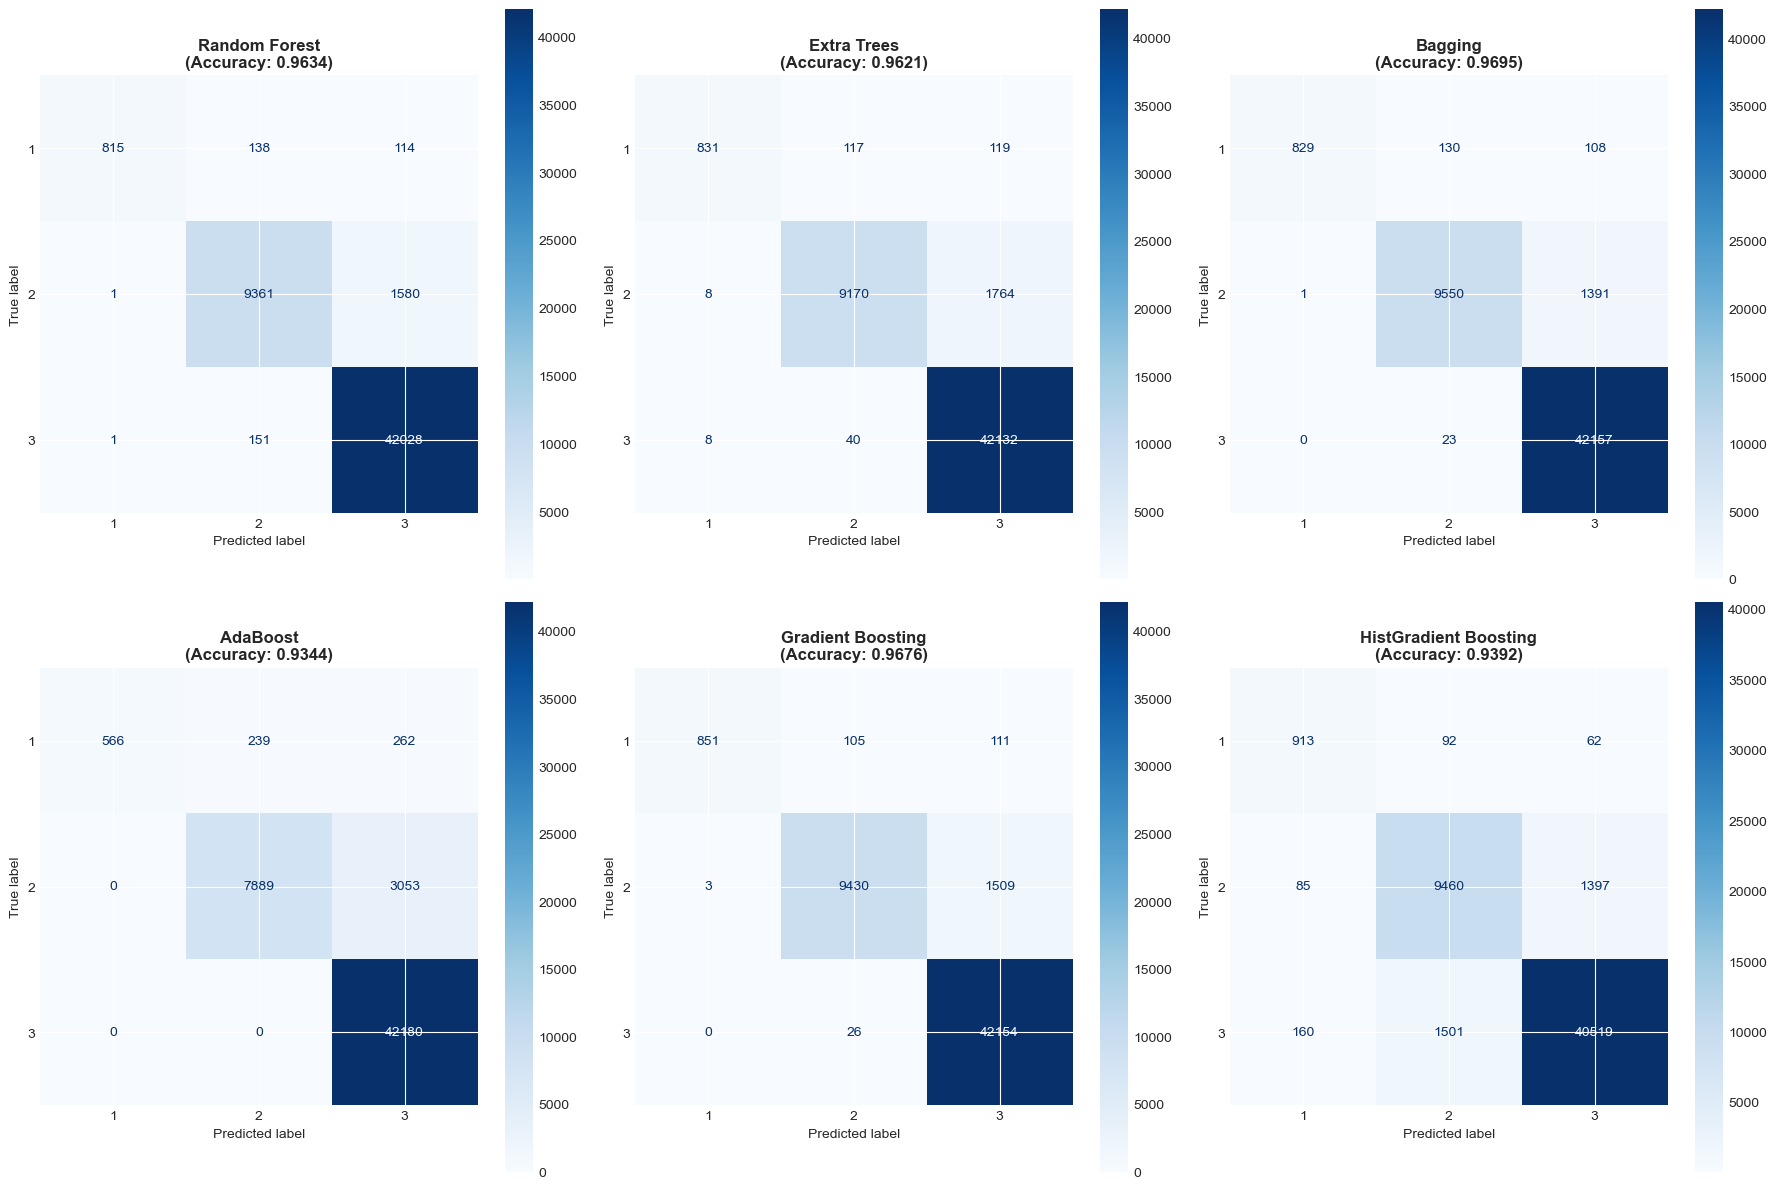

Confusion matrices displayed for all models


In [149]:
# Visualize confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['Predictions'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(ax=axes[idx], cmap='Blues')
    axes[idx].set_title(f'{name}\n(Accuracy: {result["Test_Accuracy"]:.4f})', 
                        fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Confusion matrices displayed for all models")

In [150]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Train Accuracy': [results[m]['Train_Accuracy'] for m in results.keys()],
    'Test Accuracy': [results[m]['Test_Accuracy'] for m in results.keys()]
})

# Sort by test accuracy
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)
comparison_df['Rank'] = range(1, len(comparison_df) + 1)

print("Model Performance Comparison")
print("=" * 70)
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['Model']
best_accuracy = comparison_df.iloc[0]['Test Accuracy']

print(f"\n{'='*70}")
print(f"BEST MODEL: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f}")
print(f"{'='*70}")

Model Performance Comparison
                Model  Train Accuracy  Test Accuracy  Rank
              Bagging        1.000000       0.969496     1
    Gradient Boosting        0.989573       0.967632     2
        Random Forest        0.987894       0.963369     3
          Extra Trees        0.981412       0.962059     4
HistGradient Boosting        0.951585       0.939157     5
             AdaBoost        0.935341       0.934415     6

BEST MODEL: Bagging
Test Accuracy: 0.9695


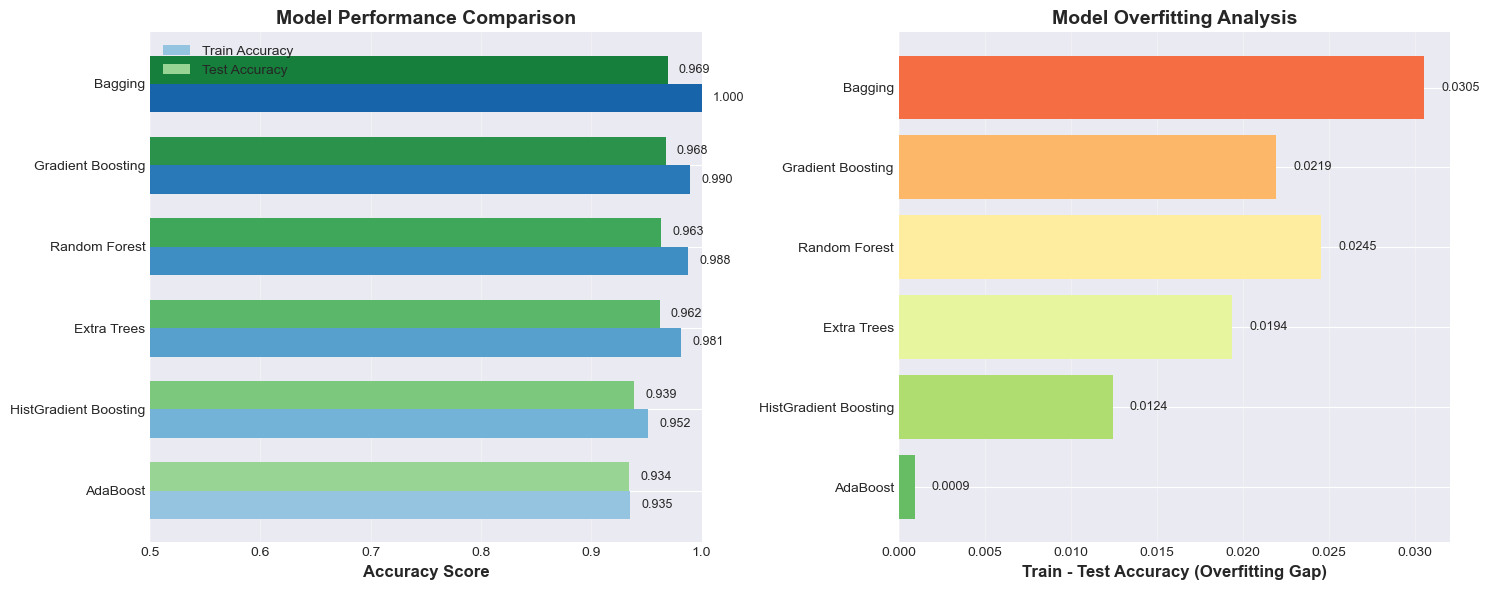

Model comparison visualizations displayed


In [151]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot comparison
comparison_sorted = comparison_df.sort_values('Test Accuracy', ascending=True)
colors_train = plt.cm.Blues(np.linspace(0.4, 0.8, len(comparison_sorted)))
colors_test = plt.cm.Greens(np.linspace(0.4, 0.8, len(comparison_sorted)))

x_pos = np.arange(len(comparison_sorted))
width = 0.35

axes[0].barh(x_pos - width/2, comparison_sorted['Train Accuracy'], width, 
             label='Train Accuracy', color=colors_train)
axes[0].barh(x_pos + width/2, comparison_sorted['Test Accuracy'], width, 
             label='Test Accuracy', color=colors_test)
axes[0].set_yticks(x_pos)
axes[0].set_yticklabels(comparison_sorted['Model'])
axes[0].set_xlabel('Accuracy Score', fontsize=12, fontweight='bold')
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='x', alpha=0.3)
axes[0].set_xlim(0.5, 1.0)

# Add value labels
for i, (train, test) in enumerate(zip(comparison_sorted['Train Accuracy'], 
                                       comparison_sorted['Test Accuracy'])):
    axes[0].text(train + 0.01, i - width/2, f'{train:.3f}', va='center', fontsize=9)
    axes[0].text(test + 0.01, i + width/2, f'{test:.3f}', va='center', fontsize=9)

# Accuracy difference plot
comparison_sorted['Overfitting'] = comparison_sorted['Train Accuracy'] - comparison_sorted['Test Accuracy']
colors_overfit = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(comparison_sorted)))

axes[1].barh(range(len(comparison_sorted)), comparison_sorted['Overfitting'], 
             color=colors_overfit)
axes[1].set_yticks(range(len(comparison_sorted)))
axes[1].set_yticklabels(comparison_sorted['Model'])
axes[1].set_xlabel('Train - Test Accuracy (Overfitting Gap)', fontsize=12, fontweight='bold')
axes[1].set_title('Model Overfitting Analysis', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, val in enumerate(comparison_sorted['Overfitting']):
    axes[1].text(val + 0.001, i, f'{val:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Model comparison visualizations displayed")

In [152]:
# Create a models directory if it doesn't exist
models_dir = Path("models3_copy")
models_dir.mkdir(exist_ok=True)

print(f"Saving models to: {models_dir.resolve()}")
print("=" * 70)

# Save the best model
model_filename = models_dir / f"best_model_{best_model_name.replace(' ', '_')}.pkl"
joblib.dump(best_model, model_filename)
print(f"✓ Best model saved: {model_filename}")

# Save the scaler
scaler_filename = models_dir / "scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"✓ Feature scaler saved: {scaler_filename}")

# Save the label encoders
encoders_filename = models_dir / "label_encoders.pkl"
joblib.dump(label_encoders, encoders_filename)
print(f"✓ Label encoders saved: {encoders_filename}")

# Save feature names for deployment
feature_names_filename = models_dir / "feature_names.pkl"
joblib.dump(final_features, feature_names_filename)
print(f"✓ Feature names saved: {feature_names_filename}")

print("=" * 70)

Saving models to: D:\nti crativa\test\models3_copy
✓ Best model saved: models3_copy\best_model_Bagging.pkl
✓ Feature scaler saved: models3_copy\scaler.pkl
✓ Label encoders saved: models3_copy\label_encoders.pkl
✓ Feature names saved: models3_copy\feature_names.pkl


In [153]:
# Create a deployment summary report
summary_report = f"""
╔═══════════════════════════════════════════════════════════════════════════════╗
║                   ACCIDENT SEVERITY PREDICTION - FINAL REPORT                 ║
╚═══════════════════════════════════════════════════════════════════════════════╝

PROJECT SUMMARY
───────────────────────────────────────────────────────────────────────────────
Target Variable: Accident_Severity
Problem Type: Multi-class Classification
Dataset Size: {len(df)} records
Training Set: {len(X_train)} records
Test Set: {len(X_test)} records

DATA PROCESSING
───────────────────────────────────────────────────────────────────────────────
Original Features: {X.shape[1]}
Selected Features: {X_final.shape[1]}
Feature Reduction: {100 * (1 - X_final.shape[1] / X.shape[1]):.1f}%

Selected Features: {', '.join(final_features)}

BEST MODEL PERFORMANCE
───────────────────────────────────────────────────────────────────────────────
Model: {best_model_name}
Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)
Train Accuracy: {comparison_df.iloc[0]['Train Accuracy']:.4f}
Overfitting Gap: {comparison_df.iloc[0]['Train Accuracy'] - best_accuracy:.4f}

ALL MODELS RANKING
───────────────────────────────────────────────────────────────────────────────
{comparison_df[['Rank', 'Model', 'Test Accuracy']].to_string(index=False)}

DEPLOYMENT ARTIFACTS
───────────────────────────────────────────────────────────────────────────────
✓ Model File: {model_filename.name}
✓ Feature Scaler: {scaler_filename.name}
✓ Label Encoders: {encoders_filename.name}
✓ Feature Names: {feature_names_filename.name}

USAGE INSTRUCTIONS FOR DEPLOYMENT
───────────────────────────────────────────────────────────────────────────────
1. Load the model:
   model = joblib.load('models/best_model_{best_model_name.replace(' ', '_')}.pkl')
   scaler = joblib.load('models/scaler.pkl')
   features = joblib.load('models/feature_names.pkl')

2. Prepare new data:
   - Ensure categorical variables are properly encoded
   - Use the same feature names as defined
   - Scale the features using the saved scaler

3. Make predictions:
   X_new_scaled = scaler.transform(X_new[features])
   predictions = model.predict(X_new_scaled)

TIMESTAMP: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
═══════════════════════════════════════════════════════════════════════════════
"""

print(summary_report)

# Save the report to a text file
report_filename = models_dir / "deployment_report.txt"
with open(report_filename, 'w') as f:
    f.write(summary_report)

print(f"\nDeployment report saved to: {report_filename}")


╔═══════════════════════════════════════════════════════════════════════════════╗
║                   ACCIDENT SEVERITY PREDICTION - FINAL REPORT                 ║
╚═══════════════════════════════════════════════════════════════════════════════╝

PROJECT SUMMARY
───────────────────────────────────────────────────────────────────────────────
Target Variable: Accident_Severity
Problem Type: Multi-class Classification
Dataset Size: 270941 records
Training Set: 216752 records
Test Set: 54189 records

DATA PROCESSING
───────────────────────────────────────────────────────────────────────────────
Original Features: 56
Selected Features: 20
Feature Reduction: 64.3%

Selected Features: 1st_Road_Class, Age_Band_of_Driver, Age_of_Casualty, Age_of_Driver, Casualty_Severity, Day_of_Week, Driver_Home_Area_Type, Engine_Capacity_(CC), Hit_Object_off_Carriageway, Junction_Control, Light_Conditions, Number_of_Casualties, Number_of_Vehicles, Police_Force, Sex_of_Casualty, Sex_of_Driver, Skidding_and_Ov

In [154]:
# Test the saved model to ensure it can be loaded and used
print("\nVerifying Saved Model...")
print("=" * 70)

# Load the saved model
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
loaded_features = joblib.load(feature_names_filename)

# Make a prediction on test data
X_test_subset = X_test[loaded_features].values
X_test_scaled_new = loaded_scaler.transform(X_test_subset)
test_predictions = loaded_model.predict(X_test_scaled_new)

# Verify predictions match
verification_accuracy = accuracy_score(y_test, test_predictions)
print(f"✓ Model loaded successfully")
print(f"✓ Loaded model test accuracy: {verification_accuracy:.4f}")
print(f"✓ Predictions match original model: {np.array_equal(test_predictions, results[best_model_name]['Predictions'])}")
print("\nAll systems ready for deployment!")


Verifying Saved Model...
✓ Model loaded successfully
✓ Loaded model test accuracy: 0.9695
✓ Predictions match original model: True

All systems ready for deployment!


In [ ]:
# X_train_no_leak = X_train.drop(columns=["Casualty_Severity"])
# X_test_no_leak  = X_test.drop(columns=["Casualty_Severity"])

# clf.fit(X_train_no_leak, y_train)
# y_pred = clf.predict(X_test_no_leak)

# print("Accuracy without Casualty_Severity:",
#       accuracy_score(y_test, y_pred))


Accuracy without Casualty_Severity: 0.6736607060473527


In [ ]:
# df[["Casualty_Severity", "Accident_Severity"]].corr()

,Casualty_Severity,Accident_Severity
Casualty_Severity,1.000000,0.821898
Accident_Severity,0.821898,1.000000


In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(random_state=42)
# dt.fit(X_train[["Casualty_Severity"]], y_train)

# y_pred = dt.predict(X_test[["Casualty_Severity"]])
# accuracy_score(y_test, y_pred)


0.9349129897211611